In [1]:
#loading resources
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
try:
    import seaborn as sns
except:
    %pip install seaborn
    import seaborn as sns

with open('resources\ChatGPTQuestions.csv', 'r') as f:
    chatGPT_questions = pd.read_csv(f, names=['preguntas'])
with open('resources\Evaluación Inicial.csv', 'r', encoding='utf-8') as f:
    evaluacion_inicial = pd.read_csv(f)
print(f'ChatGPT Questions: {len(chatGPT_questions)}')
print(f'Evaluación Inicial: {len(evaluacion_inicial)}')

ChatGPT Questions: 21
Evaluación Inicial: 16


In [2]:
print(chatGPT_questions.columns)

Index(['preguntas'], dtype='object')


In [3]:
print(evaluacion_inicial.columns)

Index(['Timestamp', 'PREGUNTA:', 'RESPUESTA',
       '¿Le resultó de utilidad la respuesta ofrecida por Gonzalo?',
       'PREGUNTA:.1', 'RESPUESTA.1',
       '¿Le resultó de utilidad la respuesta ofrecida por Gonzalo?.1',
       'PREGUNTA:.2', 'RESPUESTA.2',
       '¿Le resultó de utilidad la respuesta ofrecida por Gonzalo?.2'],
      dtype='object')


In [4]:
for index, pregunta in enumerate(chatGPT_questions['preguntas']):
    if index < 15:
        chatGPT_questions.loc[index, 'contexto']=index//5
    else:
        chatGPT_questions.loc[index, 'contexto']=(index-15)//3 + 3
chatGPT_questions['contexto'] = chatGPT_questions['contexto'].astype(int)
chatGPT_questions

,preguntas,contexto
0,¿Cuáles son las funciones propias del destino ...,0
1,¿Bajo qué condiciones está autorizado el Subof...,0
2,¿Bajo qué circunstancias el servicio de presen...,0
3,¿Cómo se realiza la presentación del Suboficia...,0
4,"¿Quiénes son los responsables de la redacción,...",0
5,¿Cuál es el procedimiento para comunicar una b...,1
6,¿Cuáles son las responsabilidades de los Mando...,1
7,¿Cómo se debe informar al Servicio Sanitario d...,1
8,¿Cuál es el plazo máximo para remitir el parte...,1
9,¿Qué información debe contener el parte de sol...,1


In [5]:
def search_question(question, df):
    return df[df['preguntas'].str.contains(question)]

In [6]:
def generate_pregunta(pregunta, contexto, es_util, df):
    sq = search_question(pregunta, chatGPT_questions)
    es_chatGPT = len(sq) > 0
    if es_chatGPT:
        contexto =sq['contexto'].values[0]
    else:
        contexto = contexto
    return {
        'contexto': contexto,
        'es_util': es_util,
        'es_chatGPT': es_chatGPT
    }

In [7]:
preguntas = []
for index, row in evaluacion_inicial.iterrows():
    for i in range(3):
        suffix = '' if i == 0 else "." + str(i)
        pregunta = row[f'PREGUNTA:{suffix}']
        es_util = row[f'¿Le resultó de utilidad la respuesta ofrecida por Gonzalo?{suffix}']
        if pregunta is not np.nan and es_util is not np.nan:
            preguntas.append(
                generate_pregunta(pregunta, i, es_util, chatGPT_questions)
            )
preguntas = pd.DataFrame(preguntas, columns=['contexto', 'es_util', 'es_chatGPT'])


<Axes: xlabel='es_chatGPT'>

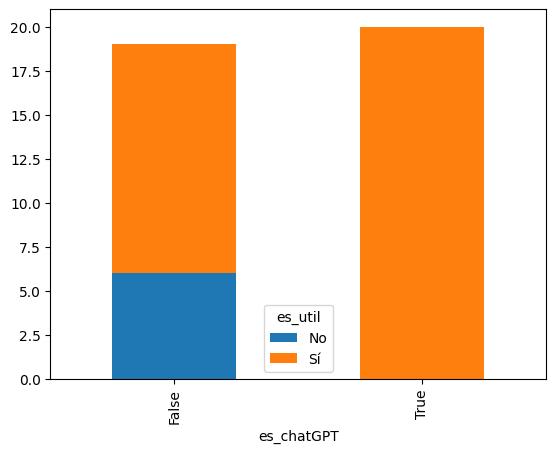

In [24]:
preguntas[['es_util', 'es_chatGPT']].pivot_table(index='es_chatGPT', columns='es_util', aggfunc=len, fill_value=0).plot.bar(stacked=True)

array([<Axes: ylabel='0'>, <Axes: ylabel='1'>, <Axes: ylabel='2'>,
       <Axes: ylabel='3'>, <Axes: ylabel='4'>], dtype=object)

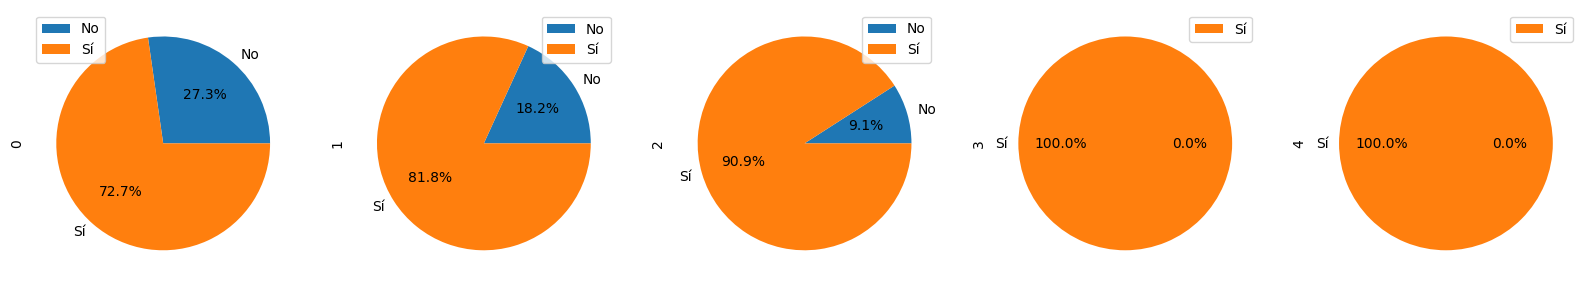

In [21]:
preguntas[['contexto', 'es_util']].pivot_table(index='es_util', columns='contexto', aggfunc=len, fill_value=0).plot.pie(subplots=True, figsize=(20, 10), autopct='%1.1f%%')